In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle
from random import shuffle
from skimage.feature import hog

import os
import glob
import cv2
import time
from helper_functions import *

%matplotlib inline  

from sklearn.svm import LinearSVC
from sklearn import svm, grid_search
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
from sklearn.cross_validation import train_test_split
from scipy.ndimage.measurements import label

print('Running this from: ', os.getcwd())

Running this from:  /home/tebd/Documents/sdc/CarND-Vehicle-Detection


/usr/local/lib/python3.4/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python3.4/dist-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


<h3> Rename images to bring them into single folder

/usr/local/lib/python3.4/dist-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


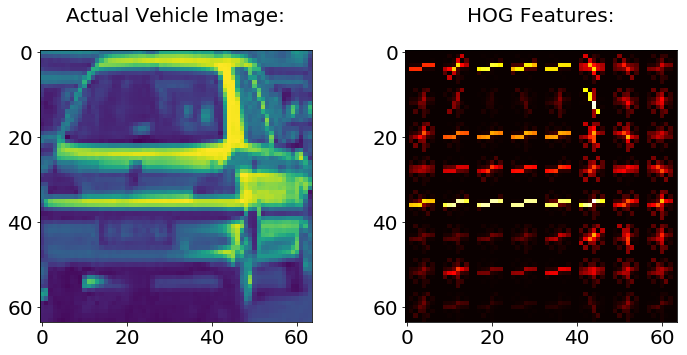

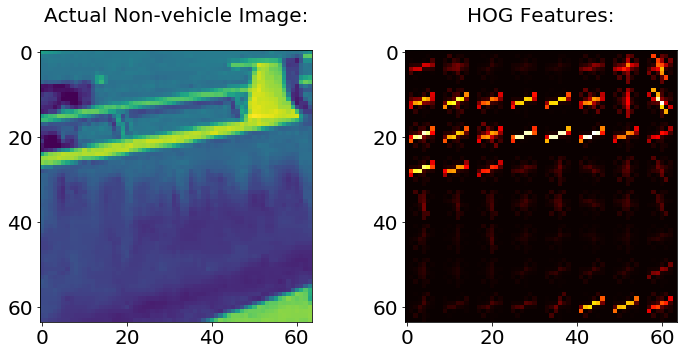

In [3]:
#Plot HOG features

veh_img = cv2.imread("./data/vehicles/vehicles_train/GTI_Left_image0391.png")
veh_img = cv2.cvtColor(veh_img,cv2.COLOR_BGR2RGB)
veh_img = cv2.cvtColor(veh_img,cv2.COLOR_BGR2GRAY)

non_veh_image = cv2.imread("./data/non-vehicles/non-vehicles_train/Extras_extra5379.png")
non_veh_image = cv2.cvtColor(non_veh_image,cv2.COLOR_BGR2RGB)
non_veh_image = cv2.cvtColor(non_veh_image,cv2.COLOR_BGR2GRAY)

veh_features, veh_hog_image = hog(veh_img, 
                          orientations=9, 
                          pixels_per_cell=(8, 8),
                          cells_per_block=(2, 2),
                          visualise=True,
                          feature_vector=False)

non_veh_features, non_veh_hog_image = hog(non_veh_image, 
                          orientations=9, 
                          pixels_per_cell=(8, 8),
                          cells_per_block=(2, 2),
                          visualise=True,
                          feature_vector=False)

fig = plt.figure(figsize=(12, 5));
fig.add_subplot(1, 2, 1)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
plt.imshow(veh_img)
plt.title('Actual Vehicle Image:\n', fontsize=20);
fig.add_subplot(1, 2, 2)
plt.imshow(veh_hog_image, cmap='hot')
plt.title('HOG Features:\n', fontsize=20);
plt.savefig('output_images/hog_visualization.png', bbox_inches="tight")

plt.show()

fig = plt.figure(figsize=(12, 5));
fig.add_subplot(1, 2, 1)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
plt.imshow(non_veh_image)
plt.title('Actual Non-vehicle Image:\n', fontsize=20);
fig.add_subplot(1, 2, 2)
plt.imshow(non_veh_hog_image, cmap='hot')
plt.title('HOG Features:\n', fontsize=20);
plt.savefig('output_images/hog_visualization.png', bbox_inches="tight")


In [ ]:
#Separately extract features for train and test

vehicles_train = glob.glob('./data/vehicles/vehicles_train/*.png')
non_vehicles_train = glob.glob('./data/non-vehicles/non-vehicles_train/*.png')
vehicles_test = glob.glob('./data/vehicles/vehicles_test/*.png')
non_vehicles_test = glob.glob('./data/non-vehicles/non-vehicles_test/*.png')
veh_all = vehicles_train + vehicles_test
shuffle(veh_all)
nonVeh_all = non_vehicles_train+non_vehicles_test
shuffle(nonVeh_all)

color_space = 'LUV' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orientations = 9  # HOG orientations
pixels_per_cell = 16 # HOG pixels per cell
cells_per_block = 4 # HOG cells per block
hog_channel = "ALL" # Can be 0, 1, 2, or "ALL"
spatial_size = (16, 16) # Spatial binning dimensions
hist_bins = 16 # Number of histogram bins
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off
y_start_stop = [None, None]

veh_features = extract_features(veh_all, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orientations, pix_per_cell=pixels_per_cell, 
                        cell_per_block=cells_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)

not_veh_features = extract_features(nonVeh_all, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orientations, pix_per_cell=pixels_per_cell, 
                        cell_per_block=cells_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)

X = np.vstack((veh_features, not_veh_features)).astype(np.float64)
X_scaler = StandardScaler().fit(X)
scaled_X = X_scaler.transform(X)

X = np.vstack((veh_features, not_veh_features)).astype(np.float64)
X_scaler = StandardScaler().fit(X)
scaled_X = X_scaler.transform(X)

y = np.hstack((np.ones(len(veh_features)), np.zeros(len(not_veh_features))))

print (scaled_X.shape)
print (y.shape)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y,test_size=0.2)

In [ ]:
# Define the labels vector
# y = np.hstack((np.ones(len(veh_features)), np.zeros(len(nonveh_features))))

# # Split up data into randomized training and test sets
# rand_state = np.random.randint(0, 100)
# X_train, X_test, y_train, y_test = train_test_split(
#     scaled_X, y, test_size=0.2, random_state=rand_state)

print('Feature vector length:', len(X_train[0]))
svc = LinearSVC(C=0.01)
# Check the training time for the SVC
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')

In [ ]:
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))

In [ ]:
#pickle.dump( svc, open( "model_svm.p", "wb" ) )
#pickle.dump(X_scaler,open('X_scaler.p','wb'))

In [ ]:
image = cv2.imread('./test_images/test4.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#image = image.astype(np.float32)/255
draw_image = np.copy(image)
y_start_stop = [350,700]

windows = slide_window(image, x_start_stop=[None, None], y_start_stop=y_start_stop, 
                    xy_window=(64, 64), xy_overlap=(0.85, 0.85))

hot_windows = search_windows(image, windows, svc, X_scaler, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orientations, pix_per_cell=pixels_per_cell, 
                        cell_per_block=cells_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)                       

In [ ]:
window_img = draw_boxes(draw_image, hot_windows)                    

f = plt.figure(figsize=(20, 5))
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30)

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image:\n', fontsize=30);
plt.subplot(1, 2, 2)
plt.imshow(window_img)
plt.title('Bounding Boxes:\n', fontsize=30);

bbox_pickle = {}
all_bboxes = hot_windows
bbox_pickle["bboxes"] = all_bboxes
pickle.dump(bbox_pickle, open("output_images/bbox_pickle.p", "wb"));

plt.savefig('output_images/all_window_detections.png')


In [ ]:
img = mpimg.imread('test_images/test4.jpg')
#image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#img = undistort(img)
heatmap = np.zeros_like(img[:,:,0].astype(np.float))

heatmap = add_heat(heatmap, all_bboxes)
heatmap = apply_heat_threshold(heatmap)
heatmap = np.clip(heatmap-2, 0, 255)

labels = label(heatmap)

In [ ]:
f = plt.figure(figsize=(20, 5))
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30)

plt.subplot(1, 2, 1)
plt.imshow(window_img)
plt.title('Bounding Boxes:\n', fontsize=30);
plt.subplot(1, 2, 2)
plt.imshow(heatmap, cmap='hot')
plt.title('Heatmap:\n', fontsize=30);
plt.savefig('output_images/heatmap.png')

In [ ]:
labels = label(heatmap)
draw_img = draw_labeled_bboxes(np.copy(image), labels)

In [ ]:
plt.imshow(draw_img)